<a href="https://colab.research.google.com/github/BDouchet/SDATA/blob/main/NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import tensorflow as tf
import cv2
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [4]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()

print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


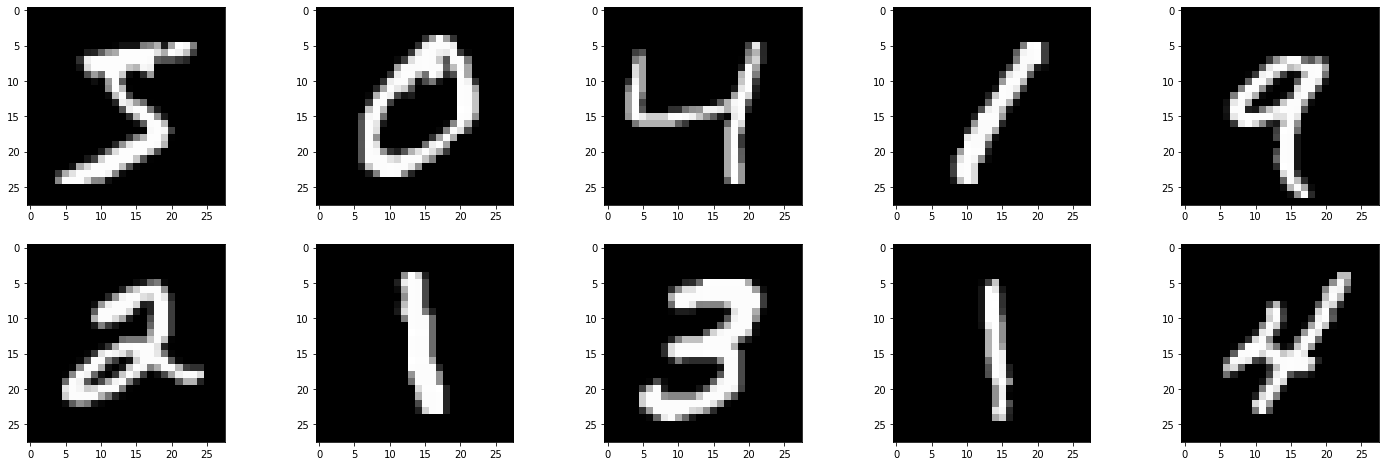

In [5]:
_,axs=plt.subplots(ncols=5,nrows=2,figsize=(25,8))
for i,ax in enumerate(axs.flatten()):
    plt.sca(ax)
    plt.imshow(x_train[i],cmap='gray')

In [6]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

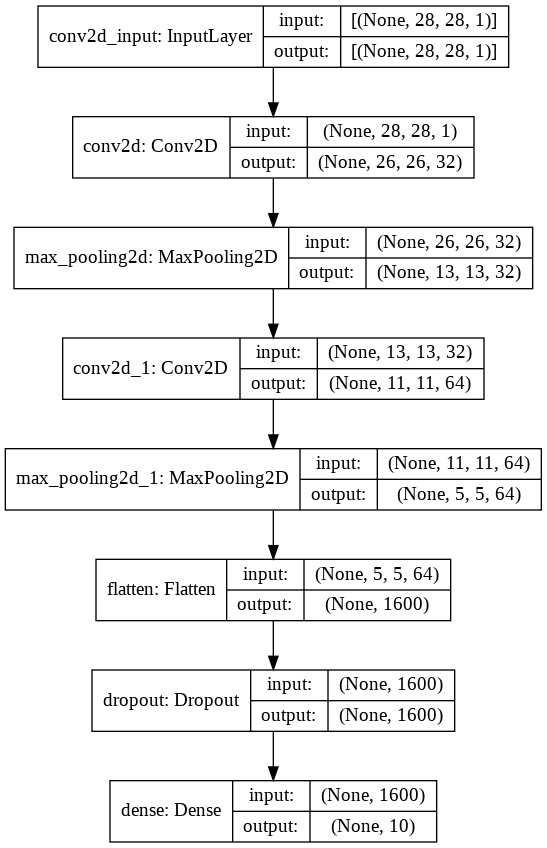

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu",input_shape=(28,28,1)))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation="softmax"))

model.summary()
tf.keras.utils.plot_model(model,show_shapes=True)

In [8]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 8s 3ms/step - loss: 0.4952 - acc: 0.8410 - val_loss: 0.0723 - val_acc: 0.9795
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0898 - acc: 0.9706 - val_loss: 0.0582 - val_acc: 0.9847
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0696 - acc: 0.9787 - val_loss: 0.0604 - val_acc: 0.9816
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0591 - acc: 0.9812 - val_loss: 0.0462 - val_acc: 0.9862
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0547 - acc: 0.9834 - val_loss: 0.0460 - val_acc: 0.9872
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0482 - acc: 0.9845 - val_loss: 0.0381 - val_acc: 0.9896
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0450 - acc: 0.9853 - val_loss: 0.0351 - val_acc: 0.9900
Epoch 8/20
1500/1500 [==============================] - 4s 3ms

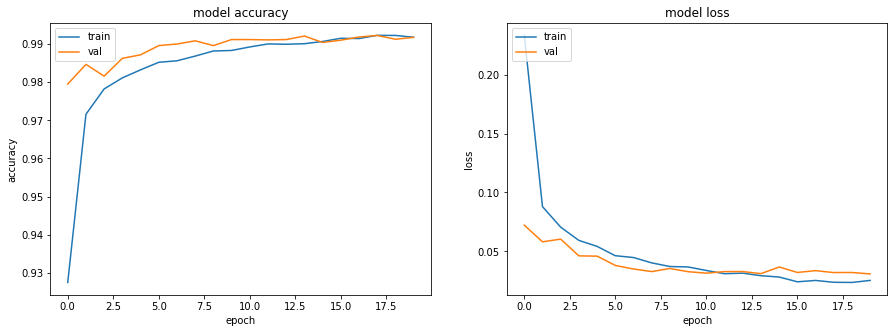

In [9]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))

ax1.plot(history.history['acc'])
ax1.plot(history.history['val_acc'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'val'], loc='upper left')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'val'], loc='upper left')

plt.show()

# Cifar

In [62]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.cifar10.load_data()

print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


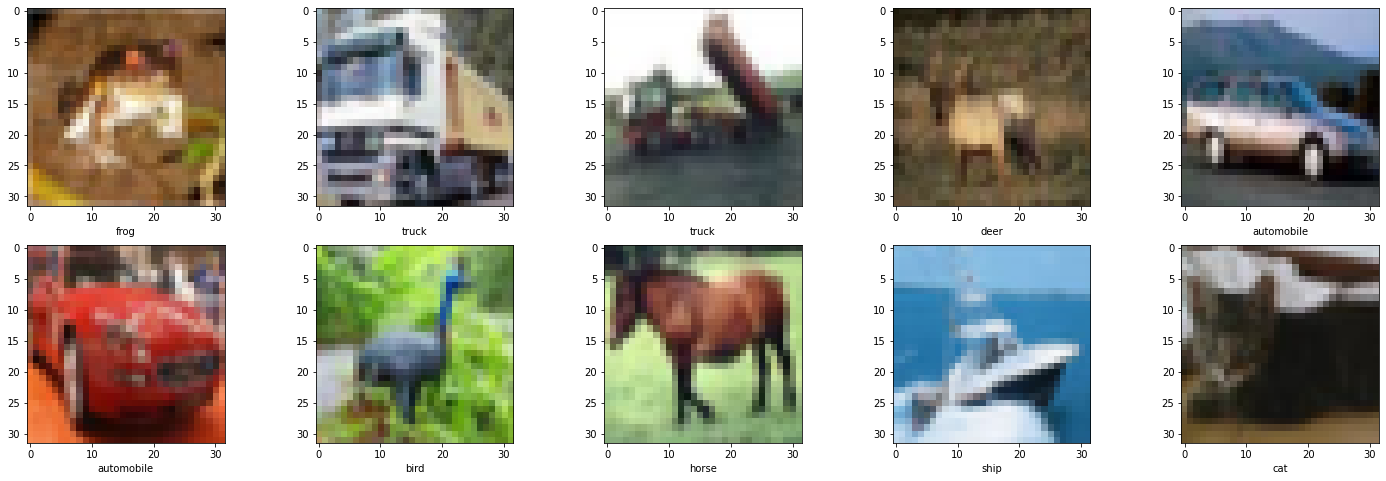

In [65]:
_,axs=plt.subplots(ncols=5,nrows=2,figsize=(25,8))
for i,ax in enumerate(axs.flatten()):
    plt.sca(ax)
    ax.set_xlabel(names[y_train[i][0]])
    plt.imshow(x_train[i],cmap='gray')

In [66]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 8, 8, 64)         

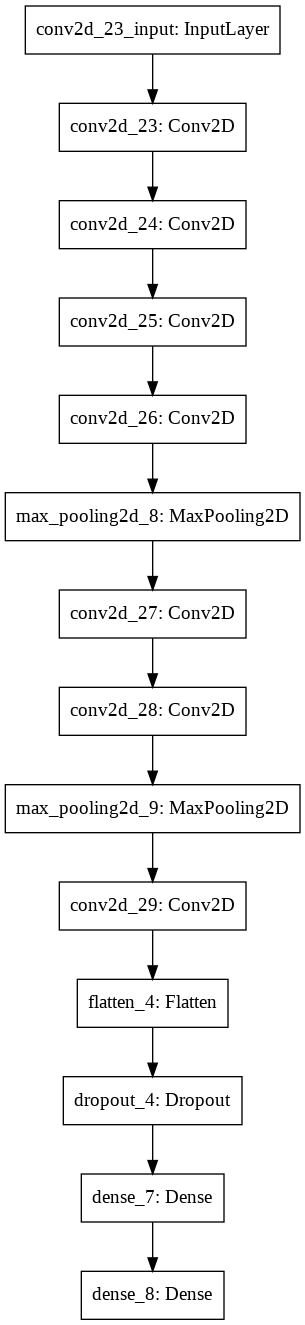

In [24]:
model=models.Sequential()
model.add(layers.Conv2D(32,3,activation='relu',input_shape=(32,32,3)))
for _ in range(3):
    model.add(layers.Conv2D(32,3,activation='relu'))
model.add(layers.MaxPool2D())
model.add(layers.Conv2D(64,3,activation='relu'))
model.add(layers.Conv2D(64,3,activation='relu'))
model.add(layers.MaxPool2D())
model.add(layers.Conv2D(128,3,activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()
tf.keras.utils.plot_model(model)

In [25]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(x_train,y_train,epochs=100,batch_size=32,validation_data=(x_test,y_test),verbose=2)

Epoch 1/100
1563/1563 - 7s - loss: 1.7780 - acc: 0.3301 - val_loss: 1.4858 - val_acc: 0.4533
Epoch 2/100
1563/1563 - 6s - loss: 1.3957 - acc: 0.4921 - val_loss: 1.2708 - val_acc: 0.5383
Epoch 3/100
1563/1563 - 6s - loss: 1.2197 - acc: 0.5646 - val_loss: 1.1150 - val_acc: 0.6002
Epoch 4/100
1563/1563 - 6s - loss: 1.1003 - acc: 0.6106 - val_loss: 1.0284 - val_acc: 0.6294
Epoch 5/100
1563/1563 - 6s - loss: 1.0132 - acc: 0.6399 - val_loss: 1.0165 - val_acc: 0.6445
Epoch 6/100
1563/1563 - 6s - loss: 0.9526 - acc: 0.6651 - val_loss: 0.9480 - val_acc: 0.6703
Epoch 7/100
1563/1563 - 6s - loss: 0.8971 - acc: 0.6842 - val_loss: 0.9075 - val_acc: 0.6791
Epoch 8/100
1563/1563 - 6s - loss: 0.8523 - acc: 0.6997 - val_loss: 0.8768 - val_acc: 0.6966
Epoch 9/100
1563/1563 - 6s - loss: 0.8157 - acc: 0.7148 - val_loss: 0.8878 - val_acc: 0.6884
Epoch 10/100
1563/1563 - 6s - loss: 0.7873 - acc: 0.7235 - val_loss: 0.8564 - val_acc: 0.7089
Epoch 11/100
1563/1563 - 6s - loss: 0.7636 - acc: 0.7318 - val_loss: 

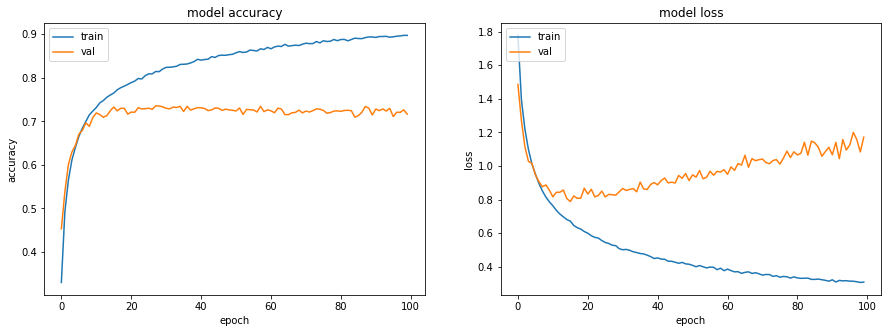

In [26]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))

ax1.plot(history.history['acc'])
ax1.plot(history.history['val_acc'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'val'], loc='upper left')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'val'], loc='upper left')

plt.show()

In [67]:
from sklearn.metrics import confusion_matrix
yhat=model.predict(x_test)
y_test_lab=[np.argmax(y) for y in y_test]
y_hat_lab=[np.argmax(y) for y in yhat]
cm=confusion_matrix(y_test_lab,y_hat_lab)
cm

array([[773,  21,  57,  23,  26,   5,   3,  15,  62,  15],
       [ 28, 891,   5,  13,   4,   1,   7,   2,  16,  33],
       [ 69,   7, 591,  99, 110,  61,  33,  18,   9,   3],
       [ 20,  10,  74, 636,  73, 115,  34,  28,   7,   3],
       [ 13,   2,  67,  68, 757,  27,  25,  37,   2,   2],
       [ 10,   2,  39, 250,  48, 597,   9,  40,   1,   4],
       [  3,  11,  68, 125,  54,  18, 708,   6,   5,   2],
       [ 14,   3,  38,  62,  91,  57,   4, 722,   3,   6],
       [100,  57,  15,  28,   7,   3,   4,   5, 763,  18],
       [ 46, 129,  12,  38,  13,   4,   2,   8,  22, 726]])

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test_lab,y_hat_lab,
                            target_names=names))

              precision    recall  f1-score   support

    airplane       0.72      0.77      0.74      1000
  automobile       0.79      0.89      0.84      1000
        bird       0.61      0.59      0.60      1000
         cat       0.47      0.64      0.54      1000
        deer       0.64      0.76      0.69      1000
         dog       0.67      0.60      0.63      1000
        frog       0.85      0.71      0.77      1000
       horse       0.82      0.72      0.77      1000
        ship       0.86      0.76      0.81      1000
       truck       0.89      0.73      0.80      1000

    accuracy                           0.72     10000
   macro avg       0.73      0.72      0.72     10000
weighted avg       0.73      0.72      0.72     10000



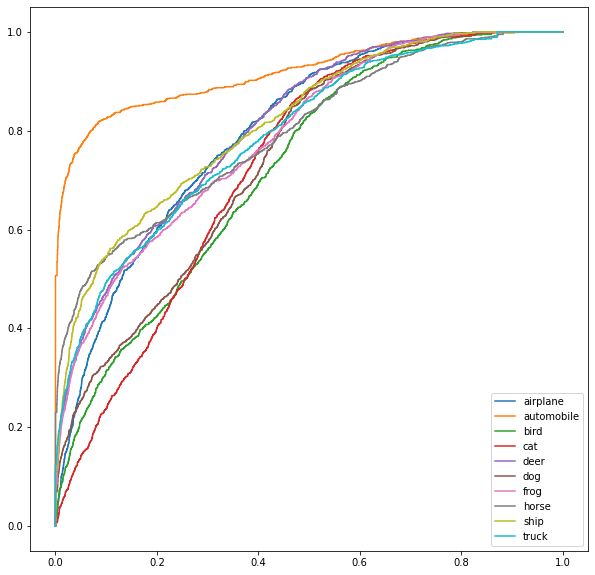

In [70]:
from sklearn.metrics import roc_curve

y_test_i=np.array([np.zeros(len(y_test_lab)) for _ in range(10)])
y_hat_prob=np.array([np.zeros(len(y_test_lab)) for _ in range(10)])

for i in range(10000):
    y_test_i[y_test_lab[i],i]=1
    y_hat_prob[:,i]=1-yhat[i][y_test_lab[i]]
    y_hat_prob[y_test_lab[i],i]=yhat[i][y_test_lab[i]]
    

plt.figure(figsize=(10,10))
for i in range(10):
    fpr, tpr, thresholds = roc_curve(y_test_i[i], y_hat_prob[i])
    plt.plot(fpr,tpr,label=names[i])
plt.legend(loc='lower right')
plt.show()


In [77]:
extractor = models.Model(inputs=model.inputs, outputs=model.layers[-2].output)

yhat2=extractor.predict(x_test)
yhat2.shape

(10000, 64)

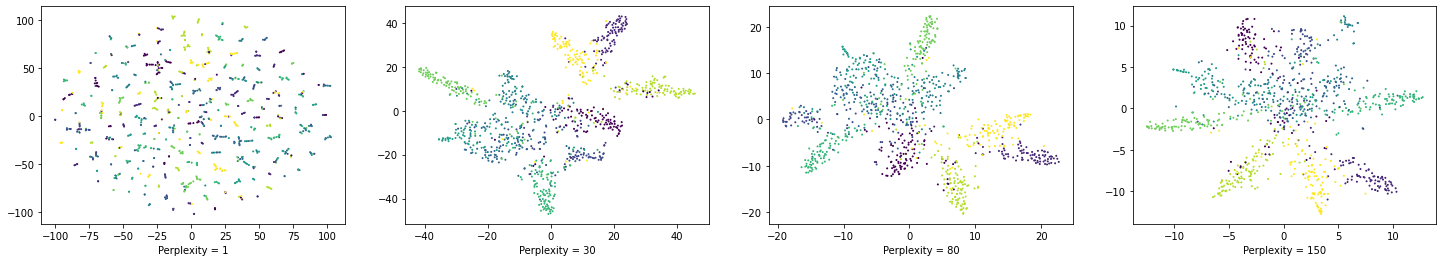

In [82]:
from sklearn.manifold import TSNE

perplexities=[1,30,80,150]

_,axs=plt.subplots(ncols=4,nrows=1,figsize=(25,4))
for i,ax in enumerate(axs.flatten()):
    plt.sca(ax)
    df_embed=TSNE(perplexity=perplexities[i]).fit_transform(yhat2[:1000])
    ax.scatter(df_embed[:,0],df_embed[:,1],c=y_test_lab[:1000],s=1)
    ax.set_xlabel('Perplexity = '+str(perplexities[i]))